# Chapter 3. ARIMA Models(1)

> #### 3.1 Introduction
> #### 3.2 Autoregressive Moving Average Models
> #### 3.3 Difference Equations
> #### 3.4 Autocorrelation and Partial Autocorrelation

# 3.1 Introduction


Classical regression is often insucient for explaining all of the interesting dynamics of a time series. 


For example, the ACF of the residuals of the simple linear regression t to the global temperature data reveals additional structure in the data that the regression did not capture. Instead, the introduction of correlation as a phenomenon that may be generated through lagged linear relations leads to proposing the autoregressive (AR) and autoregressive moving average (ARMA) models. 



Adding nonstationary models to the mix leads to the autoregressive integrated moving average (ARIMA) model popularized in the landmark work by Box and Jenkins (1970). The Box{Jenkins method for identifying a plausible ARIMA model is given in this chapter along with techniques for parameter estimation and forecasting for these models.

### AR 모형 (Auto-Regressive model)

> ####  과거의 일부 신호값과 white noise의 선형조합
> ####  autocorrelation support가 무한

### MA 모형 (Moving-Average model)
> #### white noise의 선형조합
> #### autocorrelation support가 유한

### ARMA 모형 (Auto-Regressive Moving-Average model)
> #### 신호값이 과거의 값과 white noise의 선형조합


# 3.2 Autoregressive Moving Average Models

### Defnition 3.1  Autoregressive(AR) model


> #### An autoregressive model of order p, abbreviated AR(p), is of the form
\begin{equation}
      x_t = \phi_1 x_{t-1} + \cdots + \phi_px_{t-p} + w_t
\end{equation}

>>\begin{equation}\phi(B)x_t = w_t\end{equation}
>>
> where $x_t$ is stationary, and $\phi_t$, $\phi_2$, $\cdots$ ,$\phi_p$ are constants ($\phi_p$ $\ne$ 0). Although it is not necessary yet, we assume that $w_t$ is a $Gaussian~white~noise~series$ with mean 0 and variance $\sigma^2_w$.




### Defnition 3.2  The $autoregressive~operator$ is defined to be
\begin{equation}
     \phi(B) = 1 - \phi_1 B - \phi_2 B^2 -\cdots - \phi_p B^p .
\end{equation}

> $a_i$가 다음 조건을 만족할 때 신호가 정상(stationary)
    \begin{equation}
    \text{특성식: } 1 - \phi_1 B - \phi_2 B^2 -\cdots - \phi_p B^p =0
    \end{equation}
    의 해의 크기(modulus)가 1보다 커야 한다.

### AR(1) model

> 평균 : $E[x] = 0$
    \begin{eqnarray*}
      E[x_t] = a_1 E[x_{t-1}] + E[w_t] \\
      \mu = a_1 \mu + 0 \\
      \therefore \mu = 0
    \end{eqnarray*}
>분산 : $\text{Var}[x] = \sigma^2/(1-a_1^2)$
    \begin{eqnarray*}
      \text{Var}[x_t] &=& E[(a_1 x_{t-1} + w_t)^2] \\
      &=& a_1^2 E[x_{t-1}^2] + E[x+{t-1}w_t] + E[w_t^2] \\
      &=& a_1^2 \text{Var}[x_t] + \sigma^2
    \end{eqnarray*}
> autocovariance : $\text{Cov}[x_t x_{t-k}] = a_1^k \sigma^2/(1-a_1^2)$
> autocorrelation : $\rho(k) = a_1^k$

### Example 3.1  The Sample Path of an AR(1) Process

ERROR: Error in replayPlot(obj): invalid graphics state


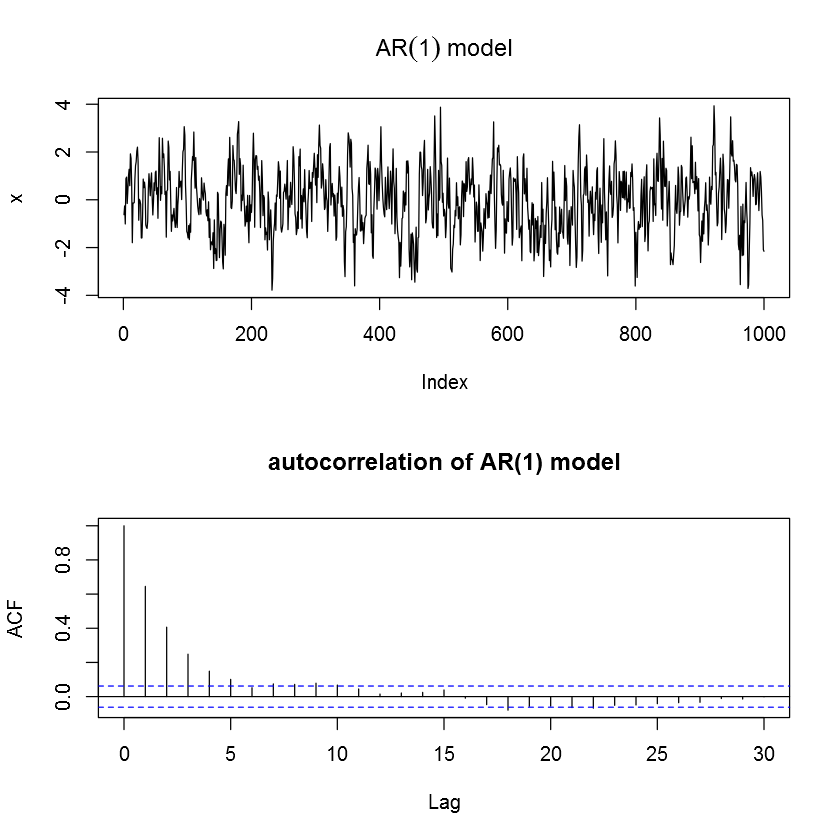

In [21]:
set.seed(1)
x <- w <- rnorm(1000)
    for (t in 2:1000) x[t] <- 0.7 * x[t-1] + w[t]
par(mfrow=c(2,1))
plot(x, type='l', main=(expression(AR(1)~model)))
acf(x, main="autocorrelation of AR(1) model")

ERROR: Error in replayPlot(obj): invalid graphics state


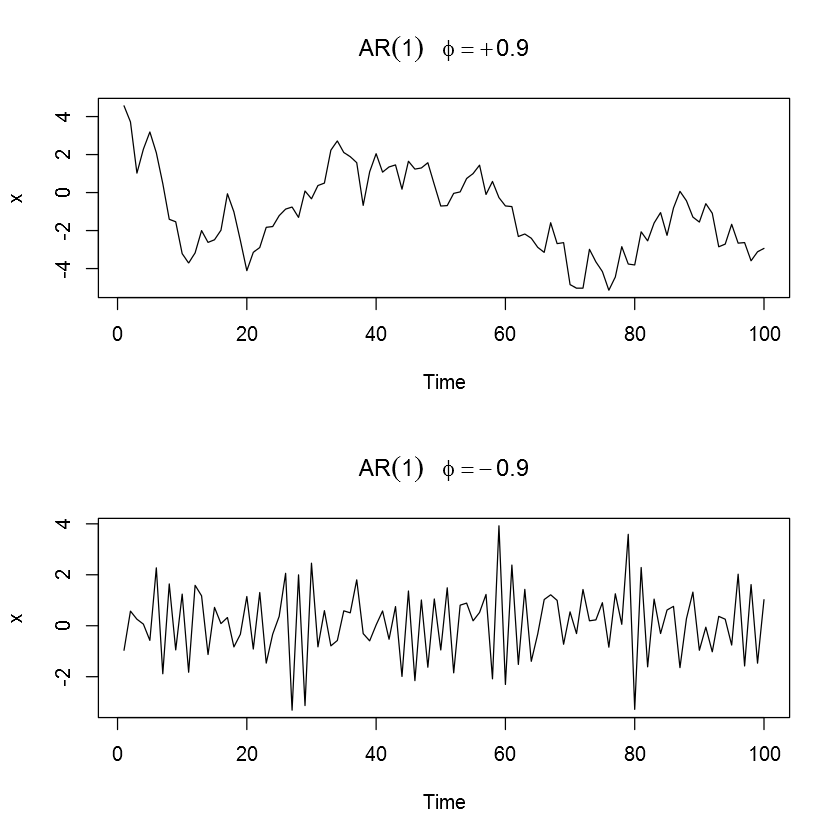

In [22]:
par(mfrow=c(2,1))
plot(arima.sim(list(order=c(1,0,0), ar=.9), n=100), ylab="x",
main=(expression(AR(1)~~~phi==+.9)))
plot(arima.sim(list(order=c(1,0,0), ar=-.9), n=100), ylab="x",
main=(expression(AR(1)~~~phi==-.9)))

### Defnition 3.3  Moving Average(MA) model




> #### The moving average model of order q, or MA(q) model, is defined to be
\begin{equation}
      x_t = w_t + \theta_1 w_{t-1} + \cdots + \theta_q w_{t-q}
\end{equation}

>> \begin{equation} x_t = \theta(B) w_t, \end{equation}
>>
where there are q lags in the moving average and $\theta_1$, $\cdots $, $\theta_q$ ($\theta_q$ $\ne$ 0) are
parameters.2



> #### MA모형은 AR모형과 달리 계수값에 관계없이 항상 정상 (stationary)

### MA 모형 특성

> 평균 : $E[x] = 0$
    \begin{eqnarray*}
      E[x_t] = E[w_t] + b_1 E[w_{t-1}] + \cdots + b_q E[w_{t-q}] = 0
    \end{eqnarray*}


> 분산 : $\text{Var}[x] = \sigma^2(1+\sum_{i=1}^q b_i^2) = \sigma^2\sum_{i=0}^q b_i^2)$
    \begin{eqnarray*}
      \text{Var}[x_t] &=& E[(w_t + b_1 w_{t-1} + \cdots + b_q w_{t-q})^2] \\
      &=& a_1^2 E[w_t^2] + b_1^2 E[w_{t-1}^2] + \cdots + b_q^2 E[w_{t-q}^2] \\
      &=& \sigma^2(1+\sum_{i=1}^q b_i^2)
    \end{eqnarray*}
    
    
 
> autocorrelation
    \begin{eqnarray*}
      \rho(k) =
        \begin{cases}
          1 & \text{if } k = 0 \\
          \dfrac{\sum_{i=0}^{q-k} b_i b_{i+k}}{\sum_{i=0}^q b_i^2} & \text{if } k = 0 \\
          0 & \text{if } x > q
        \end{cases}
    \end{eqnarray*}

### Defnition 3.4  The $moving ~average ~operator$ is defined to be
\begin{equation}
     \phi(B) = 1 - \phi_1 B - \phi_2 B^2 -\cdots - \phi_q B^q .
\end{equation}

### Example 3.4 The MA(1) Process

ERROR: Error in replayPlot(obj): invalid graphics state


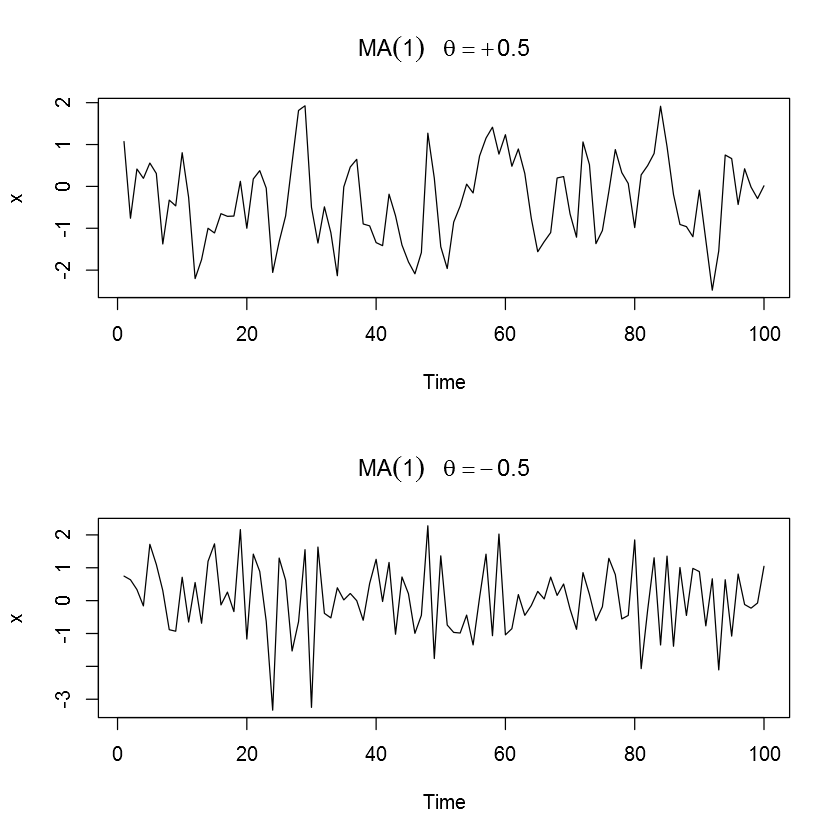

In [23]:
par(mfrow = c(2,1))
plot(arima.sim(list(order=c(0,0,1), ma=.5), n=100), ylab="x",
main=(expression(MA(1)~~~theta==+.5)))
plot(arima.sim(list(order=c(0,0,1), ma=-.5), n=100), ylab="x",
main=(expression(MA(1)~~~theta==-.5)))

ERROR: Error in replayPlot(obj): invalid graphics state


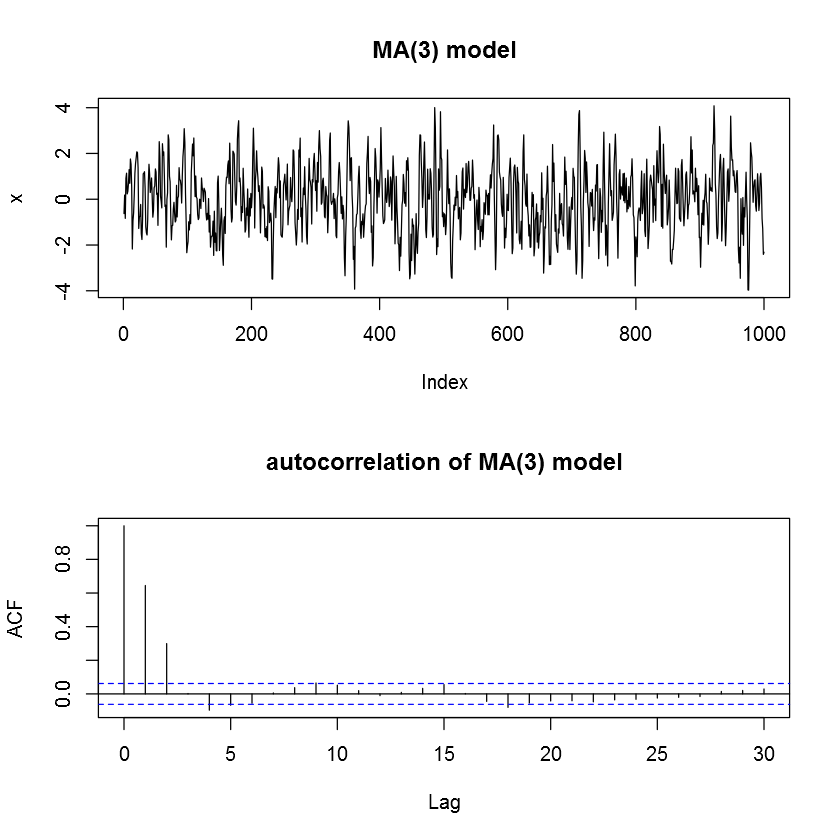

In [24]:
set.seed(1)
b <- c(0.8, 0.6, 0.2)
x <- w <- rnorm(1000)
for (t in 4:1000) {for (j in 1:3) x[t] <- x[t] + b[j] * w[t-j]}
par(mfrow=c(2,1))
plot(x, type='l', main="MA(3) model")
acf(x, main=" autocorrelation of MA(3) model " )

ERROR: Error in replayPlot(obj): invalid graphics state


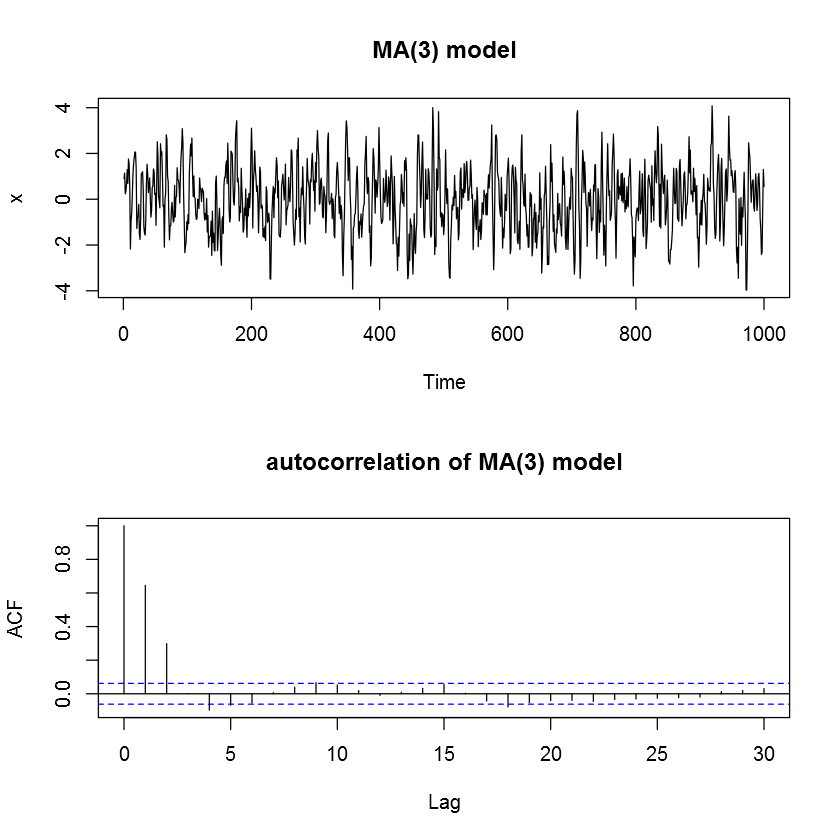

In [25]:
set.seed(1)
x <- arima.sim(model=list(ma=c(0.8, 0.6, 0.2)), 1000)
par(mfrow=c(2,1))
plot(x, type='l', main="MA(3) model")
acf(x, main="autocorrelation of MA(3) model")

### Defnition 3.5  Autoregressive Moving Average (ARMA) Models




> #### A time series {$x_t$ = 0, $\pm$1; $\pm$2; $\cdots$ } is ARMA(p, q) if it is stationary and
\begin{equation}
      x_t = \phi_1 x_{t-1} +\cdots+\phi_p x_{t-p}+w_t +\theta_1 w_{t-1} + \cdots + \theta_q w_{t-q}
\end{equation}

>> with $\phi_p \ne$ 0, $\theta_q \ne$ 0 and $\sigma^2_w$ > 0. 
>> \begin{equation} \phi(B)x_t = \theta(B)w_t \end{equation}


> The parameters p and q are called the autoregressive and the moving average orders, respectively.

>> innovation $w_t$의 과거값과 신호 자체의 과거값의 선형 조합
\begin{equation}
      x_t = \sum_{i=1}^p a_i x_{t-i}+ \sum_{i=0}^q b_i w_{t-i} \\    
      w_t : white~noise (평균:0 , 분산 \sigma^2)\\
      a_i, b_i : 모형 계수.\\
      b_0=1\\
      \end{equation}
      
      
 >> ARMA모형은 AR모형처럼 계수가 다음 조건을 만족해야 정상(stationary)
    \begin{equation}
      \text{특성식: } \; \sum_{i=1}^p a_i x^i = 1
    \end{equation}
    의 해의 크기(modulus)가 1보다 커야 한다.

### To summarize, we have seen the following problems:
> #### (i) parameter redundant models,
> #### (ii) stationary AR models that depend on the future, and
> #### (iii) MA models that are not unique.

### Defnition 3.6 The AR and MA polynomials are defined as
\begin{equation}
     \phi(z) = 1 - \phi_1 z - \phi_2 z^2 -\cdots - \phi_p z^p ,~~ \phi_p \ne 0
     \\
     \end{equation}
and
\begin{equation}
\\
   \theta(z) = 1+ \theta_1 z + \theta_2 z^2 + \cdots + \theta_p z^p ,~~ \theta_q \ne 0
   \\
   \end{equation}
   respectively, where z is a complex number.

### Defnition 3.7  An ARMA(p, q) model is said to be $causal$, if the time series {$x_t$; t = 0, $\pm$1, $\pm$2, $\cdots$} can be written as a one-sided linear process:
\begin{equation}
      x_t = \sum_{j=0}^\infty \psi_i w_{t-j}~=~ \psi (B) w_t~, \\    
\\
where~\psi (B) = \sum_{j=0}^\infty \psi_j B^j, ~and~ \sum_{j=0}^\infty |\psi_j|<\infty~;we~set~\psi_0 = 1.
\end{equation}

#### Property 3.1 Causality of an ARMA(p; q) Process


An ARMA(p, q) model is causal if and only if $\phi$(z) $\ne$ 0 for |z| ≤ 1. The coefficients of the linear process can be determined by solving

\begin{equation}
\\
\psi (z) = \sum_{j=0}^\infty \psi_j z^j~={~\theta(z)}/{\phi(z)},~~|z| ≤ 1.
\end{equation}

### Defnition 3.8  An ARMA(p, q) model is said to be $invertible$, if the time series  {$x_t$; t = 0, $\pm$1, $\pm$2, $\cdots$} can be written as
\begin{equation}
\\
      \pi(B) x_t = \sum_{j=1}^\infty \pi_j x_{t-j}~=~ w_t, \\    
where~\pi (B) = \sum_{j=0}^\infty \pi_j B^j, ~and~ \sum_{j=0}^\infty |\pi_j|<\infty~;we~set~\pi_0 = 1.
\end{equation}

#### Property 3.2 Invertibility of an ARMA(p, q) Process

An ARMA(p, q) model is $invertibility$ if and only if $\theta$(z) $\ne$ 0 for |z| ≤ 1. The coefficients of $\psi_j$ of $\psi$(B) can be determined by solving

\begin{equation}
\\
\pi(B) = \sum_{j=1}^\infty \pi_j z_{t-j}~={~\phi(z)}/{\theta(z)},~~|z| ≤ 1.
\end{equation}

arima.sim(model=list(ar=ar,ma=ma), n)


▶ ar, ma : ARMA모형 계수 벡터


▶ n : 시뮬레이션 갯수

ERROR: Error in replayPlot(obj): invalid graphics state


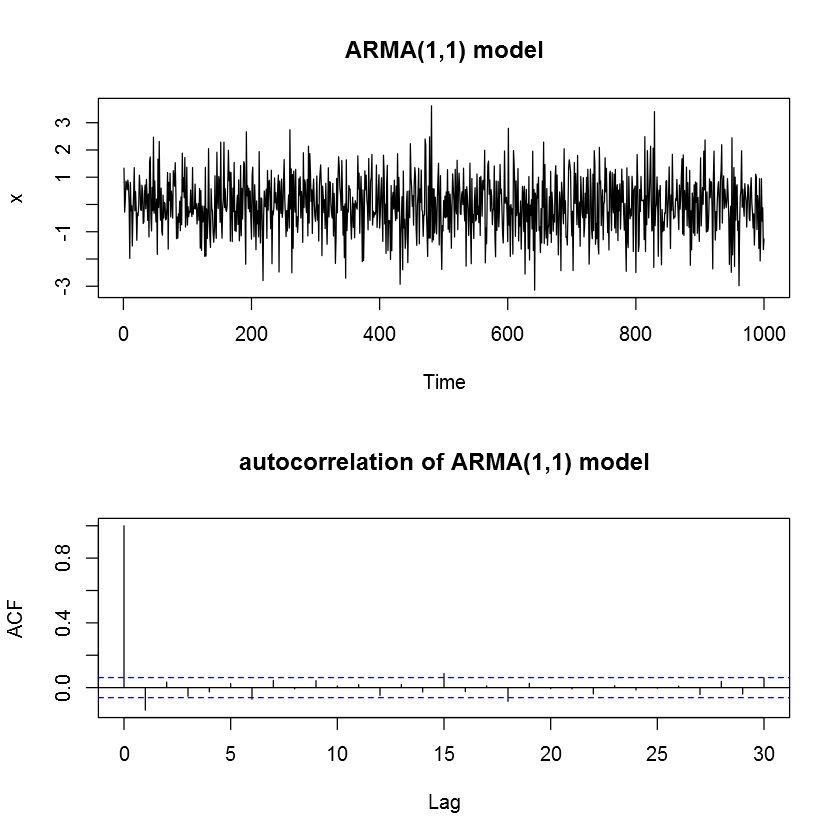

In [26]:
set.seed(1)
x <- arima.sim(model=list(ar=-0.6,ma=0.5), 1000)
par(mfrow=c(2,1))
plot(x, type='l', main="ARMA(1,1) model")
acf(x, main="autocorrelation of ARMA(1,1) model")

# 3.3 Difference Equations

 The study of the b ehavior of ARMA pro cesses and their ACFs is greatly
enhanced by a basic knowledge of difference equations, simply b ecause they
are diffe re nce equations. This topic is also useful in the study of time domain
mo dels and sto chastic pro cesses in general. We will give a brief and heuristic
account of the topic along with some examples of the usefulness of the theory.
For details, the reader is referred to Mickens (1990).

### order-$d$ Integrated 모형, I(d)
$d$ 번 차분(difference)하면 정상(stationary)상태가 되는 시계열

차분 정상 (difference-stationary) 모형

정상시계열은 0차 integrated 모형, I(0)



### Unit Root 프로세스, I(1)
1차 Integrated 모형


$\Delta x_t = x_{t+1} - x_{t}$가 정상



### ARIMA(p,d,q) 모형 (Auto-Regressive Integrated Moving Average)
$d$ 번 차분(difference)하면 ARMA(p,q) 모형이되는 시계열

특성방정식의 해 중 $d$개가 1, 나머지는 절대값이 1보다 큼
\begin{equation}
\\
        \theta_p(B)(1-B)^d x_t = \phi_q (B) w_t
\end{equation}


[1] 1+0.57735i

[1] 12

ERROR: Error in replayPlot(obj): invalid graphics state


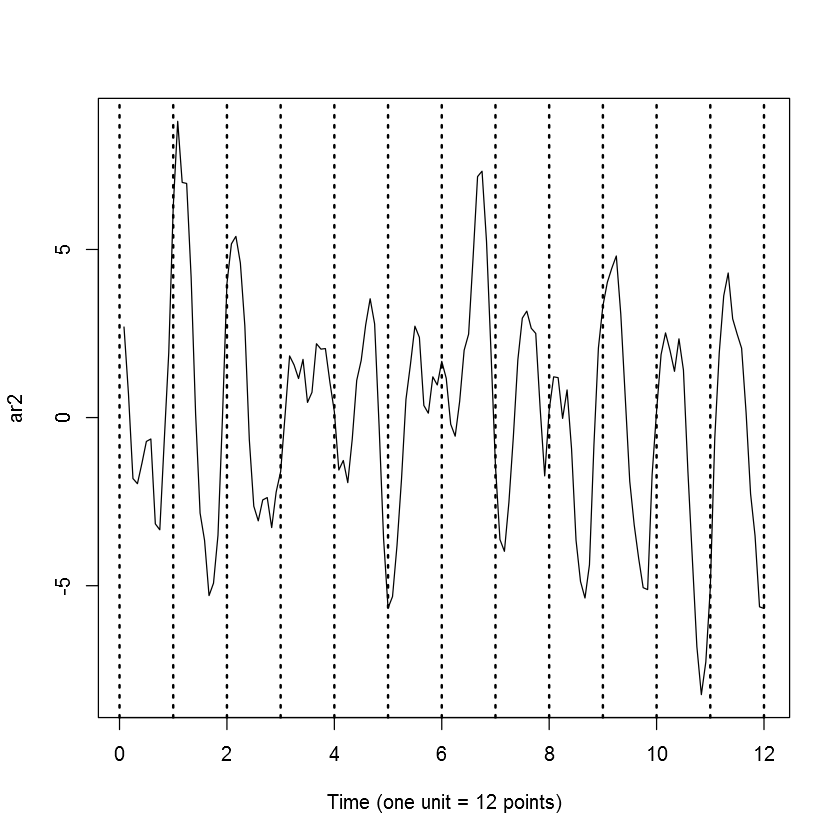

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): invalid graphics state


ERROR: Error in replayPlot(obj): invalid graphics state


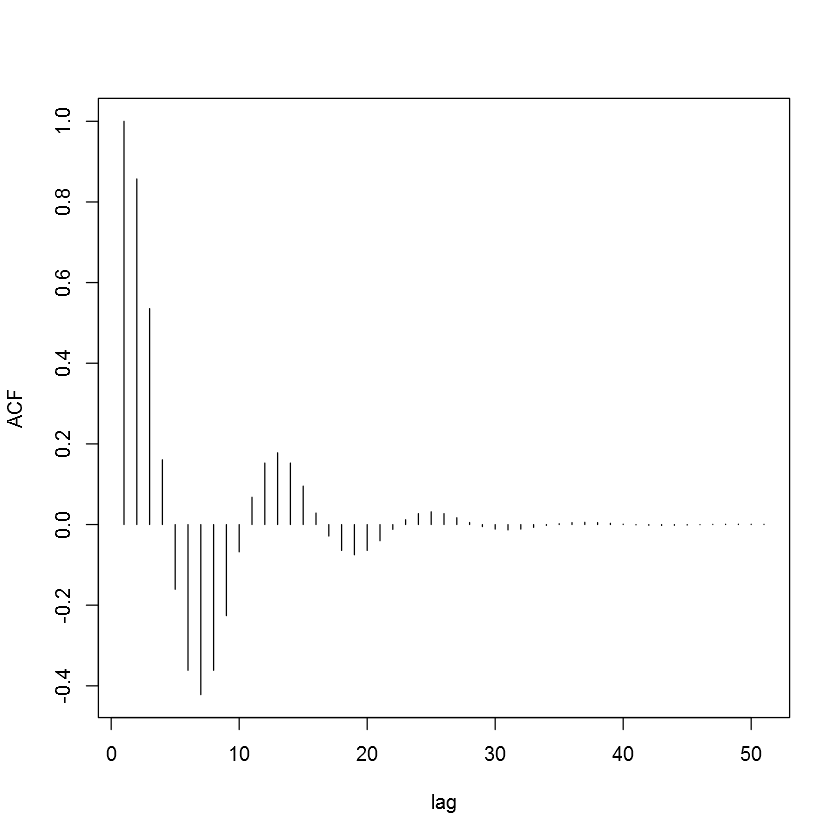

ERROR: Error in replayPlot(obj): invalid graphics state


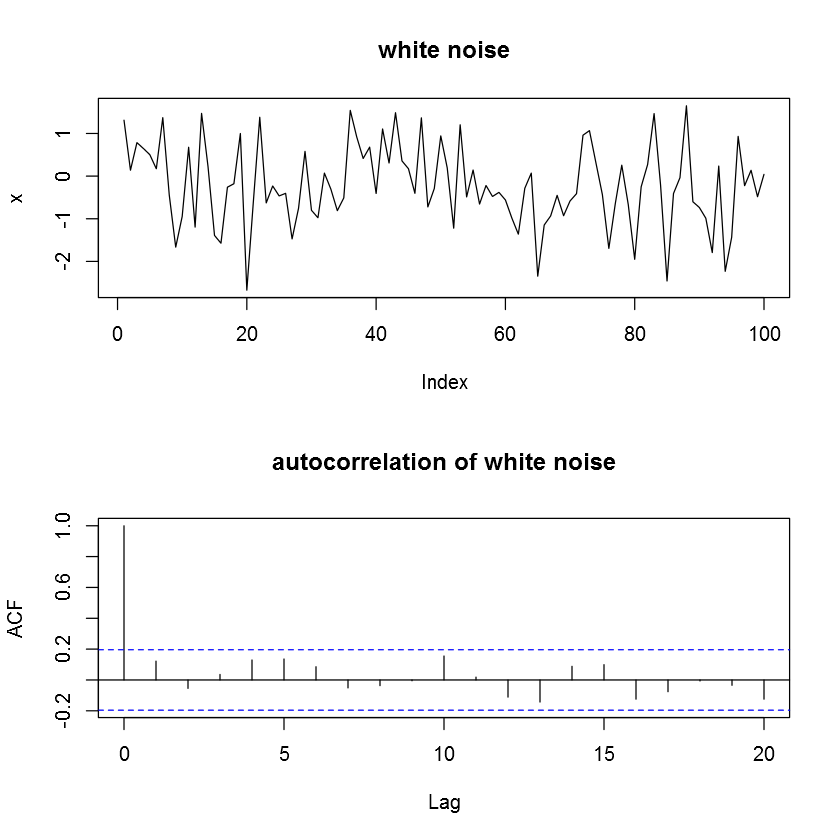

In [27]:
z = c(1,-1.5,.75) # coefficients of the polynomial
(a = polyroot(z)[1]) # print one root: 1+0.57735i = 1 + i/sqrt(3)
arg = Arg(a)/(2*pi) # arg in cycles/pt
1/arg # = 12, the pseudo period

set.seed(90210)
ar2 = arima.sim(list(order=c(2,0,0), ar=c(1.5,-.75)), n = 144)
plot(1:144/12, ar2, type="l", xlab="Time (one unit = 12 points)")
abline(v=0:12, lty="dotted", lwd=2)

# To calculate and display the ACF for this model: 

ACF = ARMAacf(ar=c(1.5,-.75), ma=0, 50)
plot(ACF, type="h", xlab="lag")
abline(h=0)

# 3.4 Autocorrelation and Partial Autocorrelation

## - Autocorrelation

<figure id="fig.redline0" style="float: none"><img src="files/1.png"><figcaption> 
</figcaption></figure>

<figure id="fig.redline0" style="float: none"><img src="files/2.png"><figcaption> 
</figcaption></figure>

## - ACF

acf(x, lag.max, type, plot=TRUE)



> ▶ x : 시계열 자료 


> ▶ lag.max : 계산할 최대 lag 수


> ▶ type : 계산 유형. "correlation", "covariance", "partial"


> ▶ plot : correlogram 그리기 여부

## - PACF

pacf(x, lag.max, plot=TRUE) : partial acf 전용 명령

<figure id="fig.redline0" style="float: none"><img src="files/3.png"><figcaption> 
</figcaption></figure>

### Example  AR model -ACF, PACF

ERROR: Error in replayPlot(obj): invalid graphics state


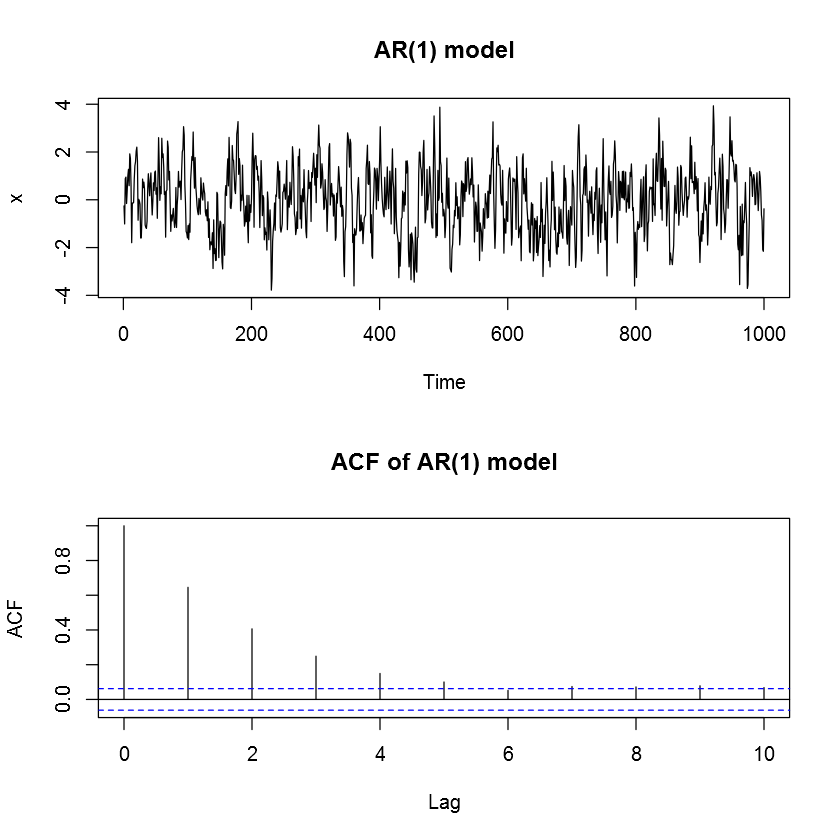

ERROR: Error in replayPlot(obj): invalid graphics state


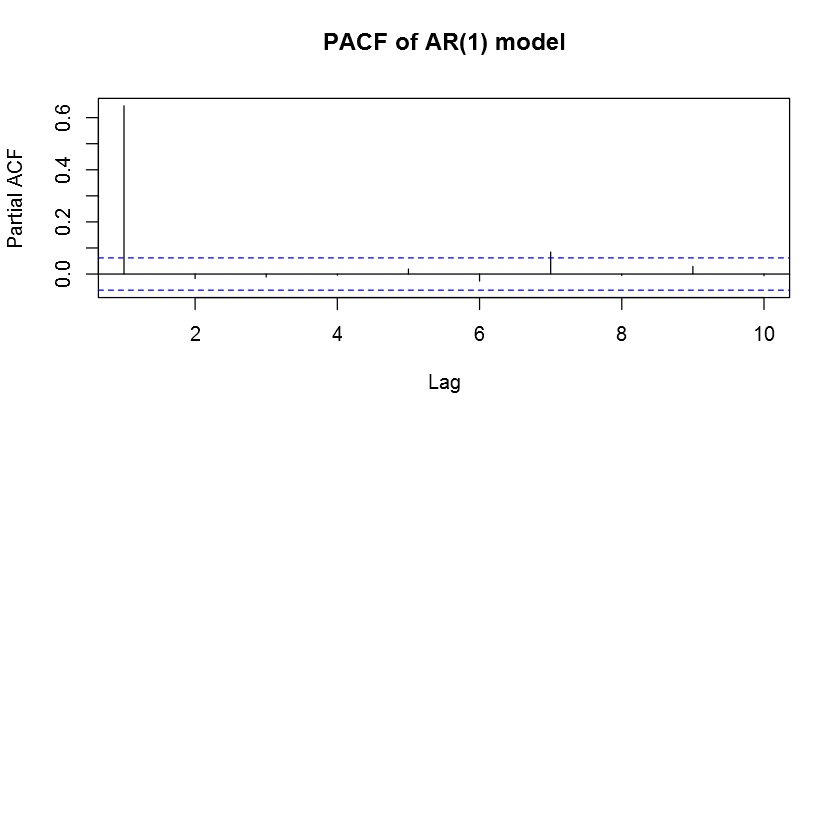

In [28]:
set.seed(1)
x <- arima.sim(model=list(ar=c(0.7)), 1000, n.start=1)
par(mfrow=c(2,1))
plot(x, type='l', main="AR(1) model")
acf(x, lag.max=10, main="ACF of AR(1) model")
acf(x, lag.max=10, "partial", main="PACF of AR(1) model")

### Example  MA model -ACF, PACF


ERROR: Error in replayPlot(obj): invalid graphics state


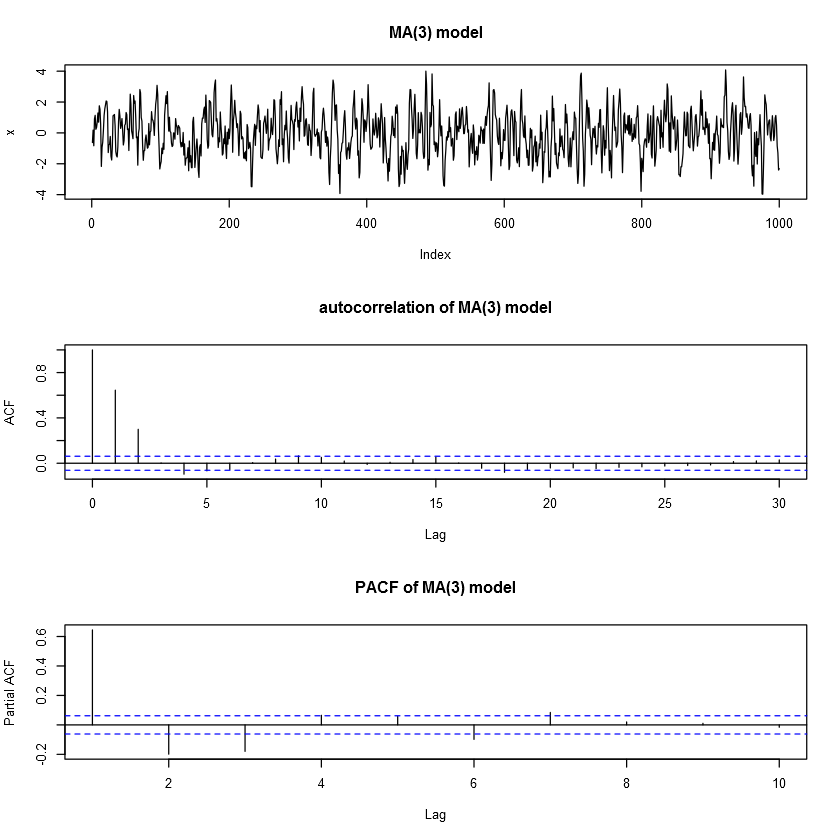

In [29]:
set.seed(1)
b <- c(0.8, 0.6, 0.2)
x <- w <- rnorm(1000)
for (t in 4:1000) {
for (j in 1:3) x[t] <- x[t] + b[j] * w[t-j]}
par(mfrow=c(3,1))
plot(x, type='l', main="MA(3) model")
acf(x, main="autocorrelation of MA(3) model")
acf(x, lag.max=10, "partial", main="PACF of MA(3) model")